# Very Deep Convolutional Networks For Large-Scale Image Recognition
- VGGNet은 2014년 ILSVRC에서 2위를 한 Oxford 대학교의 VGGNet 팀에서 만든 모델
- 구조적인 측면에서 굉장히 간단한데 성능은 훌륭하며 변형을 시켜가면서 테스트하기에 좋아 많이 사용되고 있다
- ImageNet Challenge에서 Top-5 테스트 정확도를 92.7% 달성하면서 2014년 컴퓨터 비전을 위한 딥러닝 관련 대표적 연구 중 하나로 자리매김하였다

## VGG16의 의미
- VGG : Visual Geometry Group
- 16 : 16 layers
    - 따라서, 신경망 모델의 깊이(레이어 수)에 따라 VGG19 혹은 VGG13이 될 수도 있다
    

## 의문점
- 어떻게 16-19 레이어와 같이 깊은 신경망 모델의 학습을 성공했을까?
- 왜 모든 Conv에서 3x3 필터만 사용했을까?
<br><br>
- AlexNet(2012)의 8layers 모델보다 깊이가 2배 이상 깊은 네트워크 학습에 성공했으며, ImageNet Challenge에서 오차율을 절반 (16.4 > 7.3) 으로 줄였다
- VGG 모델이 16-19 레이어에 달하는 깊은 신경망을 학습할 수 있었던 것은 **모든 합성곱 레이어에서 3x3 필터를 사용했기 때문**이다

## 네트워크의 깊이(Depth)
- AlexNet의 Layer의 수는 8개였다. 그에 비해 VGGNet16은 Layer수가 16개로 더 깊어진 것을 볼 수 있다
- 망이 깊어지면 출력단에서 하나의 픽셀이 담고 있는 정보의 양이 많아지며 훨씬 복잡한 문제를 풀 수 있게된다
![VGGNet](https://mohitjainweb.files.wordpress.com/2018/06/vggnet-vs-alexnet-e1528395392313.jpg)
- 구조는 AlexNet과 크게 다르지 않지만 확실히 깊이에서 차이가 나는걸 볼 수 있다


## 망을 깊이 했을 때의 문제점
- 성능을 올릴 수 있지만 자유파라미터(free parameter)의 수가 증가하게 되면서 overfitting에 빠질 가능성이 높아지며 연산량이 증가하여 학습 시간이 오래 걸린다는 단점이 있다

## VGGNet 구조
    - 13 Conv + 3 FC
    - 3x3 Conv filters
    - stride : 1  / padding : 1
    - 2x2 MP(stride : 2)
    - ReLU
![VGGNet_](https://production-media.paperswithcode.com/methods/vgg_7mT4DML.png)
- VGGNet의 논문에서는 오로지 깊이가 주는 영향력을 알기 위해 필터는 3x3으로 stride는 1로 고정했으며 MaxPooling은 2x2에 stride는 2로 하여 학습을 진행하였다
- VGG팀은 여러가지 방법으로 테스트를 진행했다고 한다
![VGGNet__](https://vitalab.github.io/article/images/vggnet/vggnet.jpg)
![VGGNet___](VGGNet구조.PNG)
- 위 표에 보이듯이 input을 224x224x3으로 입력받아 Conv와 Maxpool을 반복하다가 FCLayer를 연결하는 구조로 만든걸 볼 수 있으며 테스트마다 Conv의 개수를 다르게 했다는 점이 보인다
- AlexNet과 다르게 LRN을 쓰지 않았으며 3x3 필터만을 사용하여 학습시키는 것이 가장 큰 특징이다

## 3x3 필터
![VGG](https://miro.medium.com/max/1050/1*-3cYM6fQK8HiWlMjn_Y6-w.png)
- VGG모델 이전에 Convolutional Network를 활용하여 이미지 분류에서 좋은 성과를 보였던 모델들은 비교적 큰 Receptive Field를 갖는 11x11필터나 7x7필터를 포함한다.
- 그러나, VGG모델은 오직 3x3 크기의 작은 필터만 사용했음에도 이미지 분류 정확도를 비약적으로 개선시켰다. 이 부분에서 좋은 통찰을 얻을 수 있다
<br><br>
![10x10](https://miro.medium.com/max/375/1*Cgmz_DcTQXVPGMsKekDObQ.png)
<br><br>
- 10x10 이미지에 7x7필터와 3x3필터로 각각 Convolution을 수행하면 다음과 같은 특성이 있다
<br><br>
![7x7,3x3](https://miro.medium.com/max/1050/1*Cb8p7EzcWYDHUzMBYI-yyw.png)
    * 7x7 필터를 이용하여 Convolution 했을 경우 출력 특징 맵의 각 픽셀 당 Receptive Field는 7x7이다
![77,33](https://miro.medium.com/max/1050/1*E9DiwjWyLU-aQU-knOtv3g.png)
    * 3x3 필터를 이용할 경우, 3-레이어 Convolution을 반복했을 때 원본 이미지의 7x7 영역을 수용할 수 있다
    
- Stride가 1일 때, 세차례의 3x3 Conv 필터링을 반복한 특징맵은 한 픽셀이 원본 이미지의 7x7 Receptive field의 효과를 볼 수 있다.
그렇다면, 7x7필터를 이용해 이미지에 대한 한 번 Convolution을 수행한 것과 3x3필터로 세 번 Convolution을 수행한 것에는 어떤 차이가 있을까?
    1. 결정 함수의 비선형성 증가
      -  각 Convolution 연산은 ReLU 함수를 포함한다. 다시 말해, 1-layer 7x7 필터링의 경우 한 번의 비선형 함수가 적용되는 반면 3-layer 3x3 필터링은 세 번의 비선형 함수가 적용된다.
      - 따라서, 레이어가 증가함에 따라 비선형성이 증가하게 되고 이것은 모델의 특징 식별성 증가로 이어진다.
    2. 학습 파라미터 수의 감소
        - Convolutional Network 구조를 학습할 때, 학습 대상인 가중치(weight)는 필터의 크기에 해당한다.
        - 따라서, 7x7필터 1개에 대한 학습 파라미터 수는 49이고 3x3 필터 3개에 대한 학습 파라미터 수는 27(3x3x3)이 된다.
        - 파라미터 수가 크게 감소하는 것을 알 수 있다.
        - 물론 위와 같은 특징이 모든 경우에 좋은 방향으로 작용하는 것은 아니니 주의할 필요가 있다. 다시 말해, 무작정 네트워크의 깊이를 깊게 만드는 것이 장점만 있는 것은 아니다.
        - 여러 레이어를 거쳐 만들어진 특징 맵(Feature Map)은 동일한 Receptive Field에 대해 더 추상적인 정보를 담게 된다. 목적에 따라서는 더 선명한 특징 맵이 필요할 수도 있다.
<br><br>
- 모델 학습 ( VGG-16 원문에서는 학습 시 다음과 같은 최적화 알고리즘을 사용하였다 )
    * Optimizing multinomial logistic regression
    * mini-batch gradient descent
    * Momentum(0.9)
    * Weight Decay(L2 Norm)
    * Dropout(0.5)
    * Learning rate 0.01로 초기화 후 서서히 줄임
<br><br>
- 가중치 초기화
    * 딥러닝에서 신경망 가중치의 초기화는 학습 속도 및 안정성에 큰 영향을 줄 수 있기 때문에 어떤 방식으로 초기화할 것인지는 중요한 문제 중 하나이다.
    * VGG연구팀은 이러한 문제를 보완하고자 다음과 같은 전략을 세웠다
        - 상대적으로 얕은 11-Layer 네트워크를 우선적으로 학습한다. 이때, 가중치는 정규분포를 따르도록 임의의 값으로 초기화한다.
        - 어느 정도 학습이 완료되면 입력층 부분의 4개 층과 마지막 3개의 FCLayer의 Weight를 학습할 네트워크의 초기값으로 사용한다.
<br><br>
- 학습 이미지 크기
    * 모델 학습(Training)시 입력 이미지의 크기는 모두 224x224로 고정하였다
    * 학습 이미지는 각 이미지에 대해 256x256 ~ 512x512 내에서 임의의 크기로 변환하고, 크기가 변환된 이미지에서 개체(Object)의 일부가 포함된 224x224 이미지를 Crop하여 사용하였다.
<br><br>
![VGG_image_size](https://miro.medium.com/max/1050/1*GgBEeC19t2BEEYTTnC9zrA.png)
    * 등방성으로 rescale된 트레이닝 이미지
![VGG_image_size](https://miro.medium.com/max/1050/1*GoMqM5gklSZdgbzek-bxLg.png)
![VGG_image_size](https://miro.medium.com/max/1050/1*j6IOqW5REUoL7yL4xFGZMw.png)
    * 이미지를 256x256 크기로 변환 후, 224x224 크기를 샘플링한 경우
![VGG_image_size](https://miro.medium.com/max/1050/1*FfnOsvhhdJQDyHg9PjrKFA.png)
    * 이미지를 512x512 크기로 변환 후, 224x224 크기를 샘플링한 경우
    
- 이처럼 학습데이터를 다양한 크기로 변환하고 그 중 일부분을 샘플링해 사용함으로써 몇 가지 효과를 얻을 수 있다
    1. 한정적인 데이터의 수를 늘릴 수 있다 --( Data Augmentation )
    2. 하나의 오브젝트에 대한 다양한 측면을 학습 시 반영시킬 수 있다. 변환된 이미지가 작을수록 개체의 전체적인 측면을 학습할 수 있고, 변환된 이미지가 클수록 개체의 특정한 부분을 학습에 반영할 수 있다.
 - 두 가지 모두 Overfitting을 방지하는 데 도움이 된다.
 - 실제로 VGG 연구팀의 실험 결과에 따르면 다양한 스케일로 변환한 이미지에서 샘플링하여 학습 데이터로 사용한 경우가 단일 스케일 이미지에서 샘플링한 경우보다 분류 정확도가 좋았다.
 
<br><br>
- Fully-Convolutional Nets
    * Training 완료된 모델을 테스팅할 때는 신경망의 마지막 3 Fully-Connected layers를 Convolutional layers로 변환하여 사용하였다.
    * 첫 번째 Fully-Connected layer는 7x7 Conv로, 마지막 두 Fully-Connected layer는 1x1 Conv로 변환하였다. 이런식으로 변환된 신경망을 Fully-Convolutional Networks라 부른다.
    * 신경망이 Convolution 레이어로만 구성될 경우 입력 이미지의 크기 제약이 없어진다. 이에 따라 하나의 입력 이미지를 다양한 스케일로 사용한 결과들을 앙상블하여 이미지 분류 정확도를 개선하는 것도 가능해진다.

# Result
- VGG 연구팀의 실험 결과를 통해 네트워크의 깊이가 깊어질수록 이미지 분류 정확도가 높아지는 것을 확인할 수 있었다.
- 실험에서 네트워크의 깊이를 최대 19 레이어(VGG-19)까지만 사용한 이유는 해당 실험의 데이터에서는 분류 오차율이 VGG-19에서 수렴했기 때문이다. 학습 데이터 세트가 충분히 많다면 더 깊은 모델이 더 유용할 수도 있다.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPool2D, BatchNormalization, Activation, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models, losses

import cv2

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 31s 0us/step


In [3]:
# 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# 범주화
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 10))

In [10]:
# Model 

model = Sequential()
model.add(Conv2D(64, 3, strides = 1, padding = 'same', input_shape = x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation(activation = 'relu'))
model.add(Conv2D(64, 3, strides = 1, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation(activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Conv2D(128, 3, strides = 1, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation(activation = 'relu'))
model.add(Conv2D(128, 3, strides = 1, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation(activation = 'relu'))
model.add(MaxPool2D((2, 2), strides = 2))

model.add(Conv2D(256, 3, strides = 1, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation(activation = 'relu'))
model.add(Conv2D(256, 3, strides = 1, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation(activation = 'relu'))
model.add(Conv2D(256, 3, strides = 1, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation(activation = 'relu'))
model.add(MaxPool2D((2, 2), strides = 2))

model.add(Conv2D(512, 3, strides = 1, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation(activation = 'relu'))
model.add(Conv2D(512, 3, strides = 1, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation(activation = 'relu'))
model.add(Conv2D(512, 3, strides = 1, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation(activation = 'relu'))
model.add(MaxPool2D((2, 2), strides = 2))
model.add(MaxPool2D((2, 2), strides = 2))

model.add(Flatten())
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0

In [12]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['acc'])

hist = model.fit(x_train, y_train, batch_size = 128, epochs = 50, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/50
391/391 [==============================] - 22s 45ms/step - loss: 2.0560 - acc: 0.2116 - val_loss: 2.6882 - val_acc: 0.1763
Epoch 2/50
391/391 [==============================] - 17s 42ms/step - loss: 1.5306 - acc: 0.3982 - val_loss: 2.1455 - val_acc: 0.3562
Epoch 3/50
391/391 [==============================] - 17s 42ms/step - loss: 1.1301 - acc: 0.5917 - val_loss: 1.1934 - val_acc: 0.5989
Epoch 4/50
391/391 [==============================] - 17s 42ms/step - loss: 0.8892 - acc: 0.6960 - val_loss: 1.3531 - val_acc: 0.5787
Epoch 5/50
391/391 [==============================] - 17s 42ms/step - loss: 0.7267 - acc: 0.7612 - val_loss: 0.9110 - val_acc: 0.6873
Epoch 6/50
391/391 [==============================] - 17s 42ms/step - loss: 0.6168 - acc: 0.8004 - val_loss: 0.7910 - val_acc: 0.7450
Epoch 7/50
391/391 [==============================] - 17s 43ms/step - loss: 0.5370 - acc: 0.8289 - val_loss: 0.8355 - val_acc: 0.7264
Epoch 8/50
391/391 [==============================] - 17s 42ms

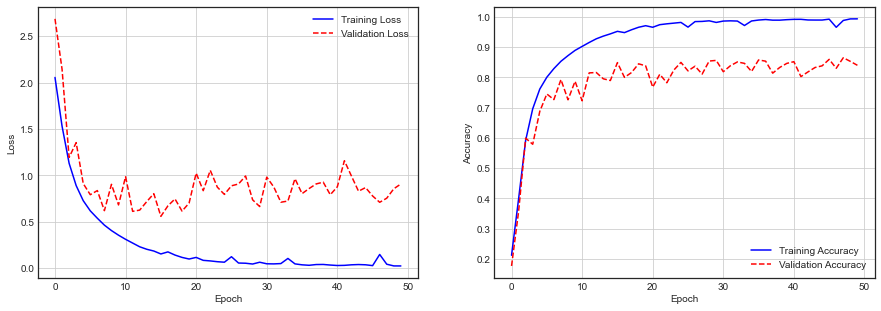

In [15]:
epochs = range(50)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, hist.history['loss'], 'b-', label = 'Training Loss')
plt.plot(epochs, hist.history['val_loss'], 'r--', label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, hist.history['acc'], 'b-', label = 'Training Accuracy')
plt.plot(epochs, hist.history['val_acc'], 'r--', label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.show()

In [16]:
score = model.evaluate(x_test, y_test, verbose = 1)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])
pred = model.predict(x_test, verbose = 1)

313/313 [==============================] - 2s 6ms/step - loss: 0.9067 - acc: 0.8398
Test loss: 0.9066946506500244
Test Accuracy: 0.8398000001907349
313/313 [==============================] - 2s 5ms/step


In [17]:
model.save('VGGNet16.h5')